In [1]:
pip install ccxt

Note: you may need to restart the kernel to use updated packages.


In [7]:
import ccxt
import pandas as pd
import time
import os
import matplotlib.pyplot as plt

In [9]:
# Initialize Binance API
exchange = ccxt.binance({
    'rateLimit': 1200,
    'enableRateLimit': True,
})

In [11]:
# Function to fetch data
def fetch_data(symbol, timeframe='15m', limit=100):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

In [13]:
# Function to save data to a CSV file
def save_data(df, filename='crypto_data.csv'):
    # Check if the file already exists
    if os.path.exists(filename):
        # Load existing data and append new data
        existing_df = pd.read_csv(filename)
        updated_df = pd.concat([existing_df, df], ignore_index=True)
    else:
        # Create a new file with the current data
        updated_df = df
    # Save the updated data to the file
    updated_df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

In [15]:
# Function to check trigger condition
def check_trigger(df, trigger_price):
    latest_close = df['close'].iloc[-1]  # Get the latest closing price
    if latest_close >= trigger_price:
        return True
    return False

In [17]:
# Function to plot graphs individually
def plot_individual_graphs(df):
    # Plot 1: Close Price Over Time
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label='Close Price', color='blue')
    plt.title('Close Price Over Time')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot 2: Volume Over Time
    plt.figure(figsize=(10, 6))
    plt.bar(df['timestamp'], df['volume'], label='Volume', color='green')
    plt.title('Volume Over Time')
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

    # Plot 3: High vs Low Prices
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['high'], label='High Price', color='orange')
    plt.plot(df['timestamp'], df['low'], label='Low Price', color='red')
    plt.title('High vs Low Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot 4: Moving Average (MA)
    plt.figure(figsize=(10, 6))
    df['MA'] = df['close'].rolling(window=20).mean()  # Calculate 20-period Moving Average
    plt.plot(df['timestamp'], df['close'], label='Close Price', color='blue')
    plt.plot(df['timestamp'], df['MA'], label='20 Period MA', color='purple')
    plt.title('Close Price with Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [19]:
# Main function
def main():
    symbol = 'WLD/USDT'  # Replace with the correct symbol for Worldcoin
    timeframe = '15m'
    max_rows = 1000  # Maximum number of rows to collect
    filename = 'crypto_data.csv'  # File to save the data
    trigger_price = 2.5  # Set your trigger price here

    try:
        while True:
            # Fetch new data
            df = fetch_data(symbol, timeframe)
            print("New data fetched:")
            print(df.tail())

            # Save the data
            save_data(df, filename)

            # Check if the dataset has reached the maximum number of rows
            if os.path.exists(filename):
                existing_df = pd.read_csv(filename)
                if len(existing_df) >= max_rows:
                    print(f"Dataset has reached {max_rows} rows. Stopping...")
                    break

            # Check trigger condition
            if check_trigger(df, trigger_price):
                print(f"Trigger activated! Latest close price: {df['close'].iloc[-1]}")

            # Plot graphs individually
            plot_individual_graphs(df)

            # Wait for 15 minutes before fetching new data
            time.sleep(900)  # 900 seconds = 15 minutes

    except Exception as e:
        print(f"An error occurred: {e}")

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 09:00:00  0.909  0.915  0.907  0.913  250394.4
96 2025-03-08 09:15:00  0.913  0.918  0.913  0.917   86944.7
97 2025-03-08 09:30:00  0.916  0.919  0.908  0.908  172508.4
98 2025-03-08 09:45:00  0.908  0.910  0.901  0.906  352683.7
99 2025-03-08 10:00:00  0.906  0.909  0.905  0.907   74480.6
Data saved to crypto_data.csv


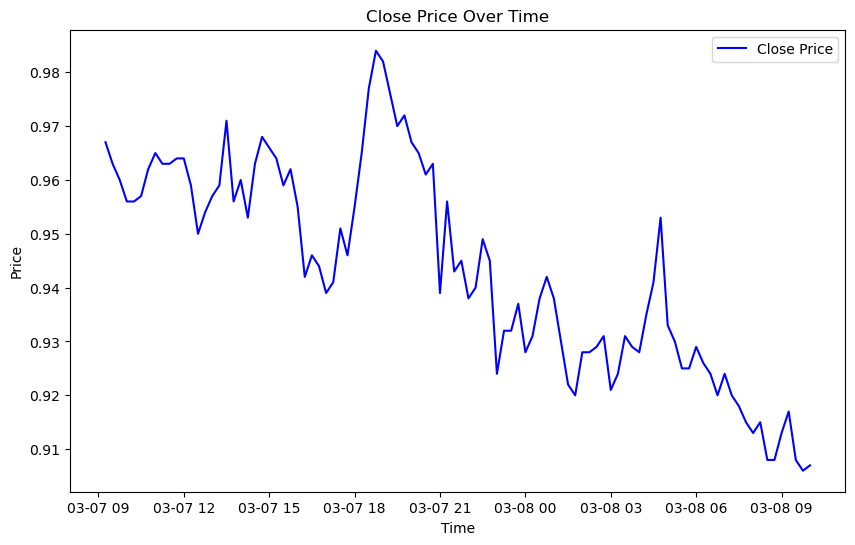

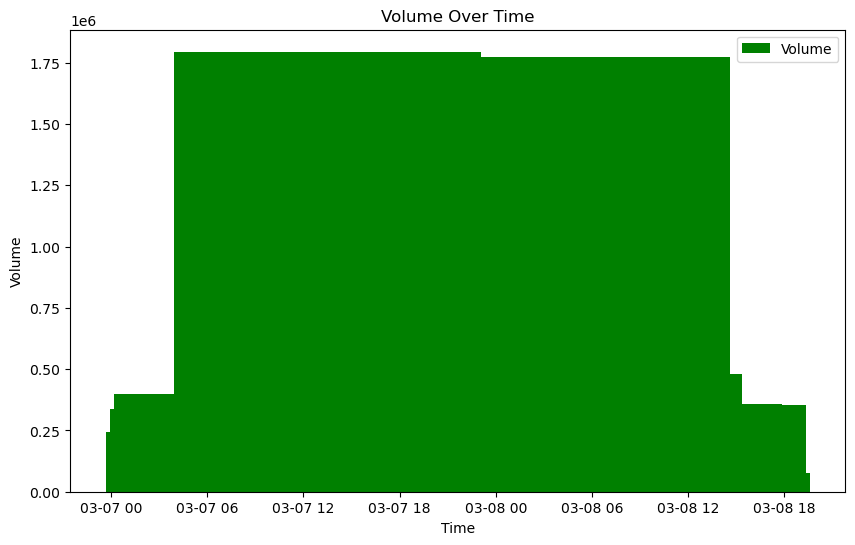

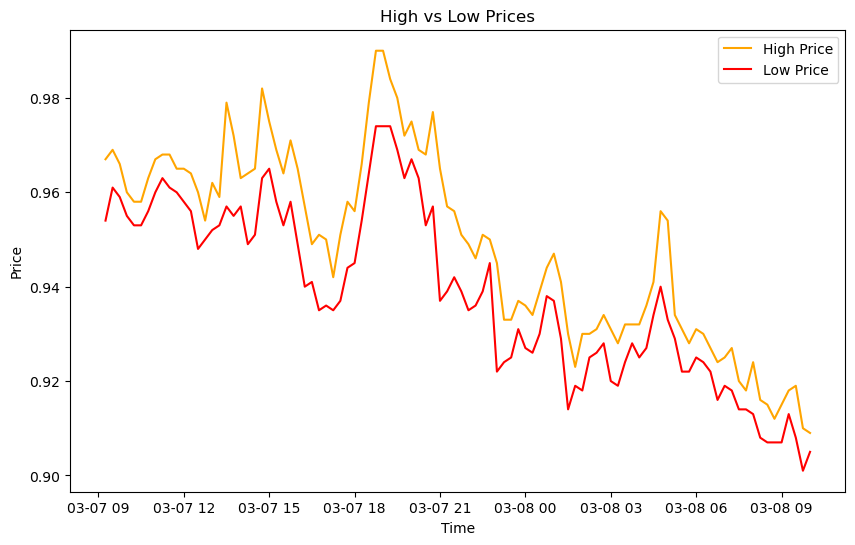

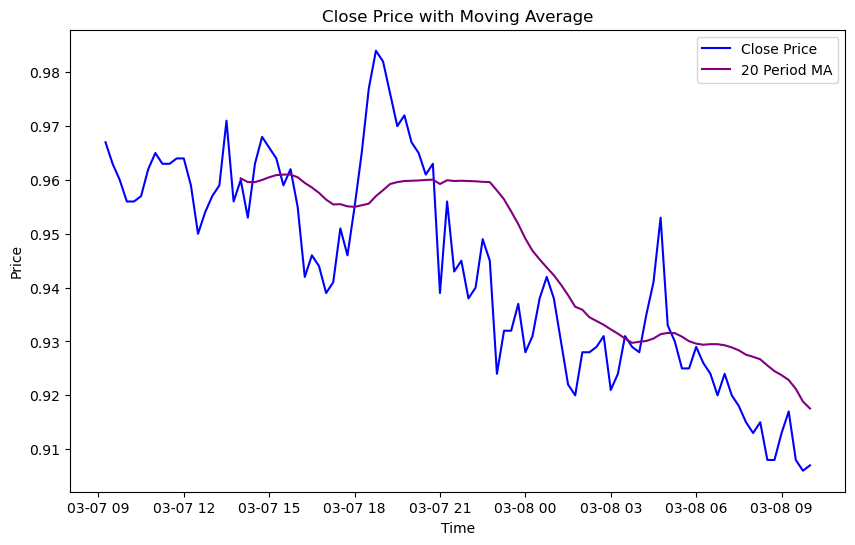

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 09:15:00  0.913  0.918  0.913  0.917   86944.7
96 2025-03-08 09:30:00  0.916  0.919  0.908  0.908  172508.4
97 2025-03-08 09:45:00  0.908  0.910  0.901  0.906  352683.7
98 2025-03-08 10:00:00  0.906  0.909  0.903  0.904  190022.4
99 2025-03-08 10:15:00  0.904  0.909  0.904  0.907   70729.8
Data saved to crypto_data.csv


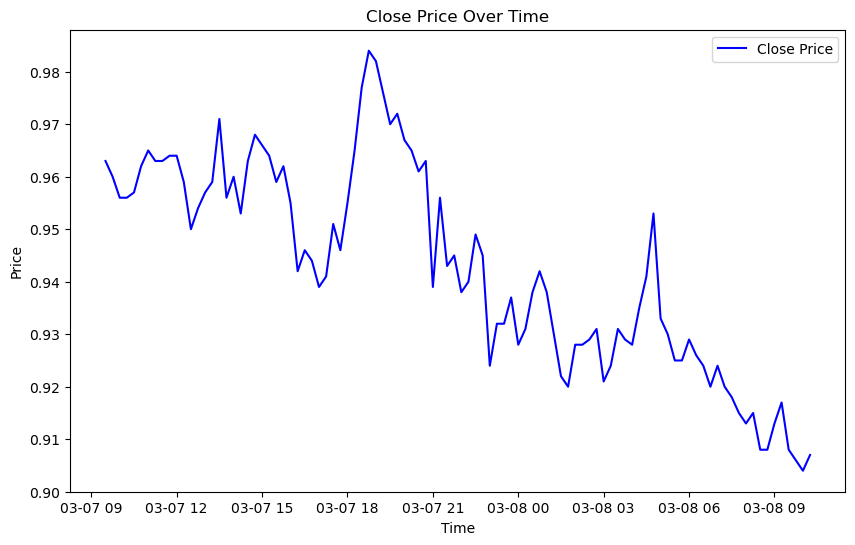

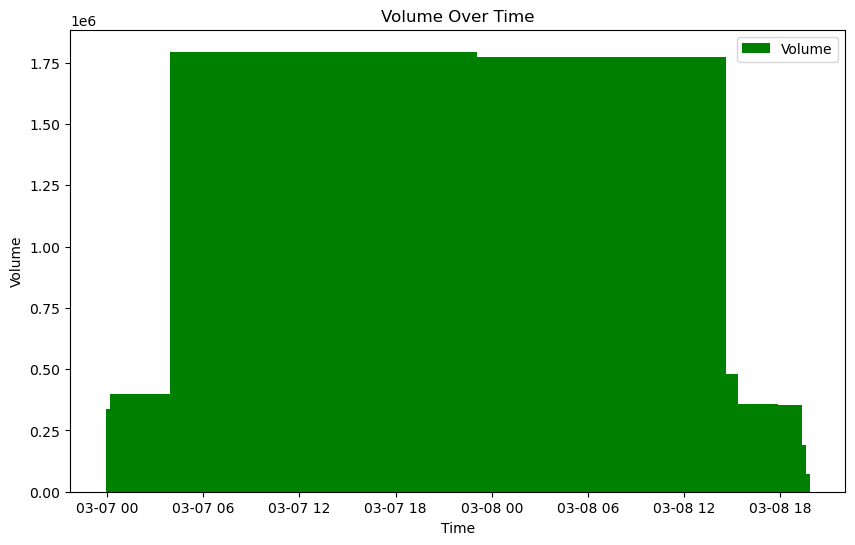

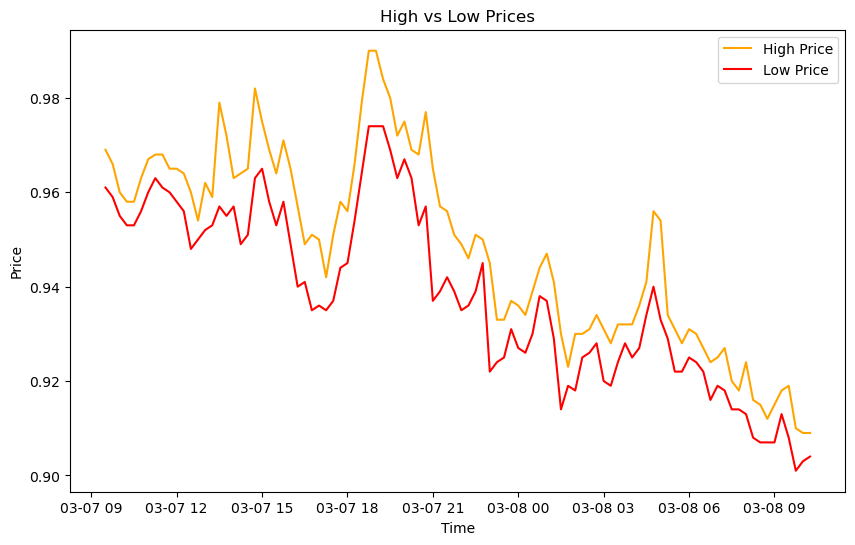

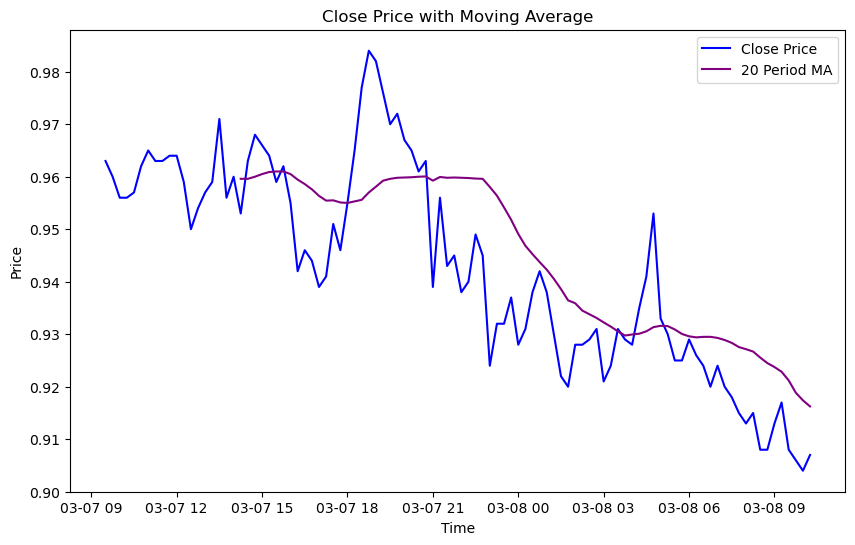

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 09:30:00  0.916  0.919  0.908  0.908  172508.4
96 2025-03-08 09:45:00  0.908  0.910  0.901  0.906  352683.7
97 2025-03-08 10:00:00  0.906  0.909  0.903  0.904  190022.4
98 2025-03-08 10:15:00  0.904  0.913  0.904  0.912  170419.1
99 2025-03-08 10:30:00  0.911  0.912  0.908  0.910  114773.0
Data saved to crypto_data.csv


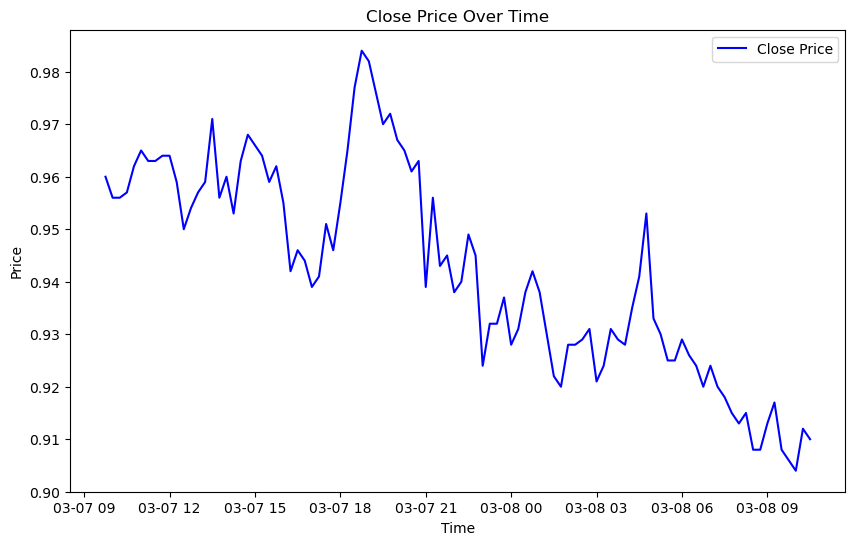

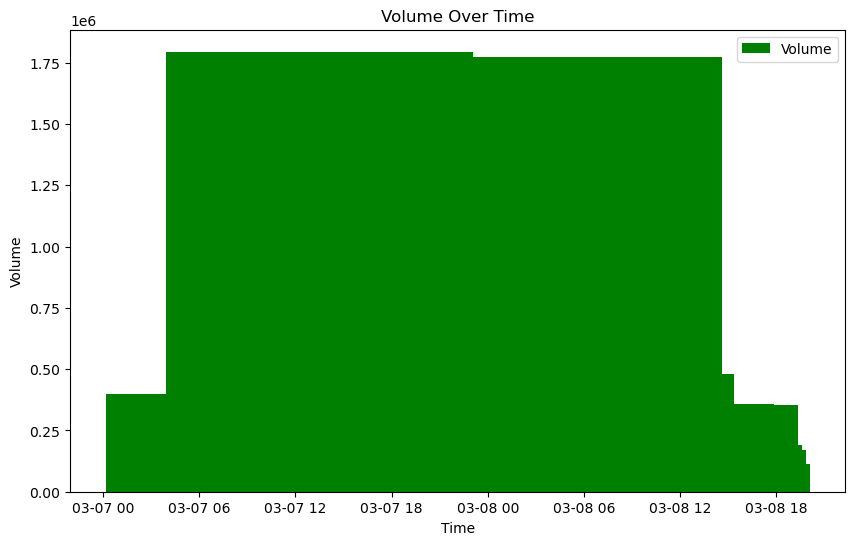

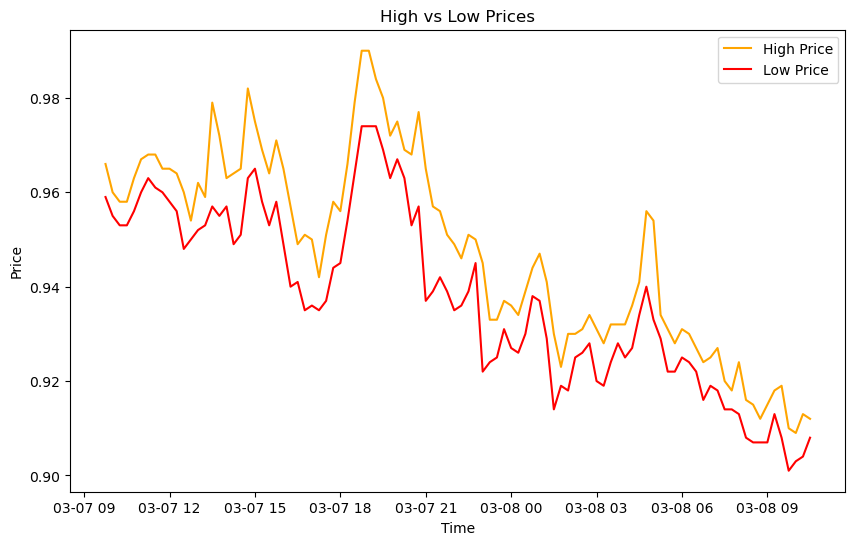

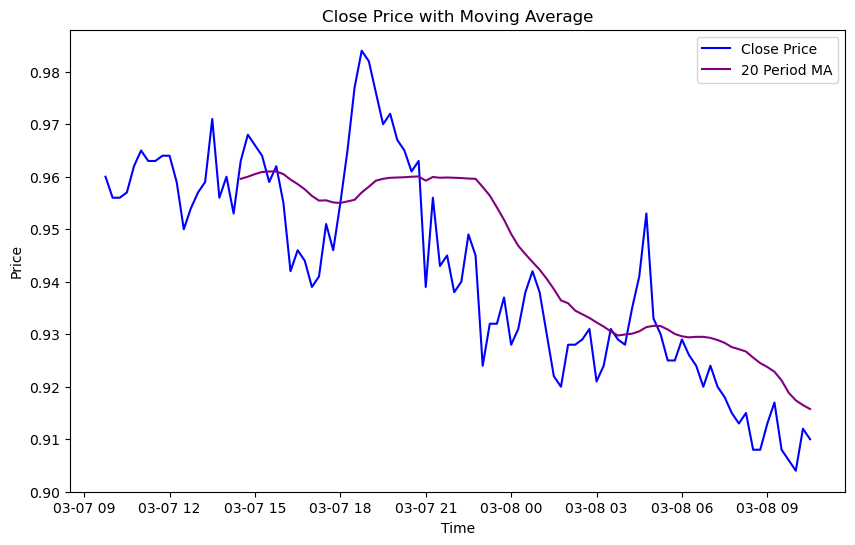

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 09:45:00  0.908  0.910  0.901  0.906  352683.7
96 2025-03-08 10:00:00  0.906  0.909  0.903  0.904  190022.4
97 2025-03-08 10:15:00  0.904  0.913  0.904  0.912  170419.1
98 2025-03-08 10:30:00  0.911  0.913  0.908  0.912  170311.9
99 2025-03-08 10:45:00  0.913  0.914  0.910  0.911   38569.8
Data saved to crypto_data.csv


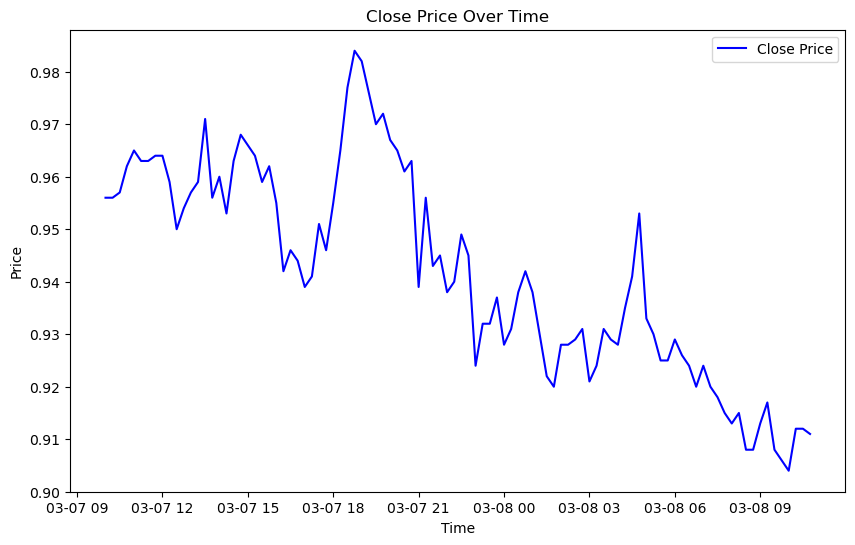

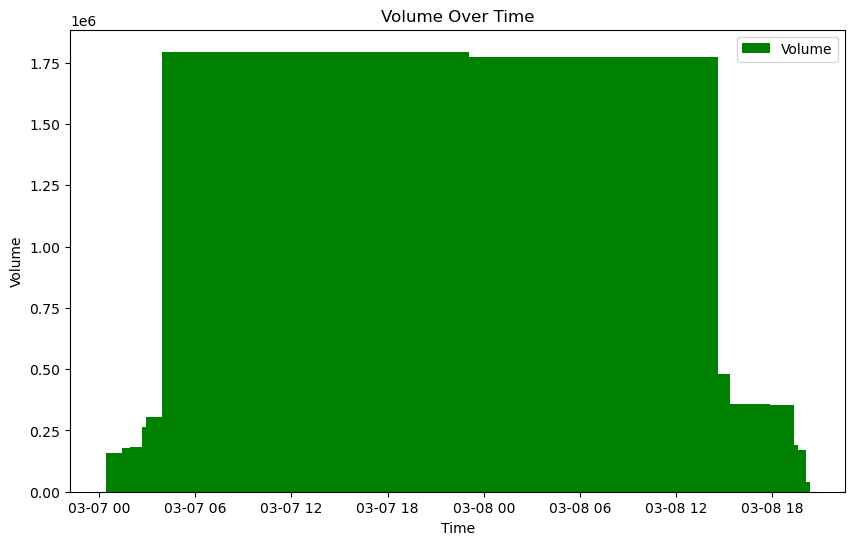

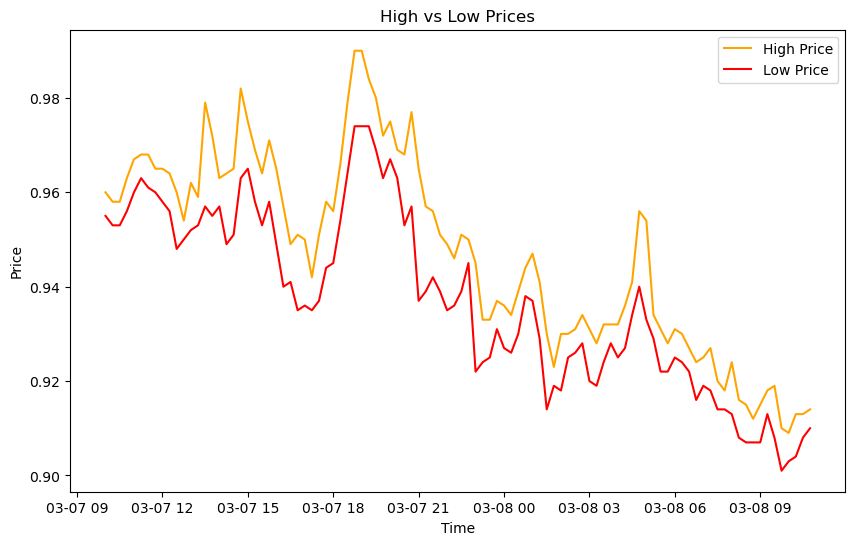

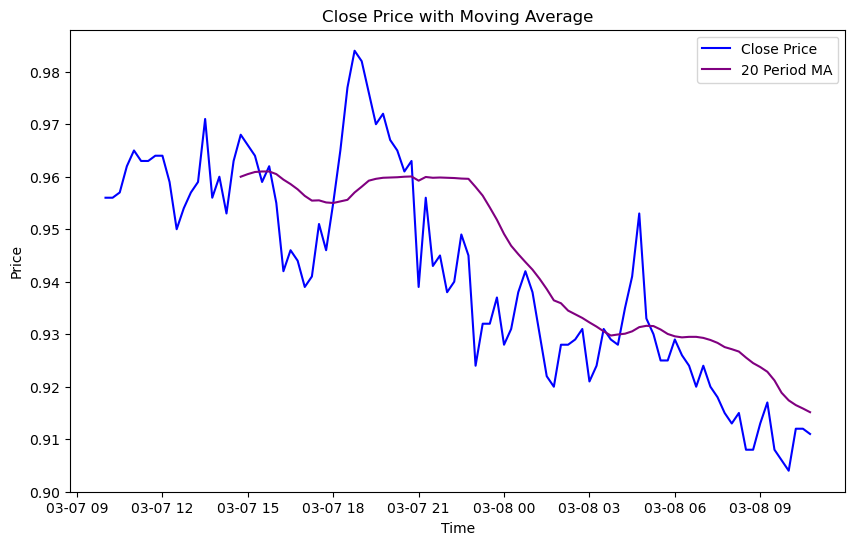

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 10:00:00  0.906  0.909  0.903  0.904  190022.4
96 2025-03-08 10:15:00  0.904  0.913  0.904  0.912  170419.1
97 2025-03-08 10:30:00  0.911  0.913  0.908  0.912  170311.9
98 2025-03-08 10:45:00  0.913  0.914  0.907  0.908  204352.0
99 2025-03-08 11:00:00  0.909  0.909  0.904  0.905  101252.0
Data saved to crypto_data.csv


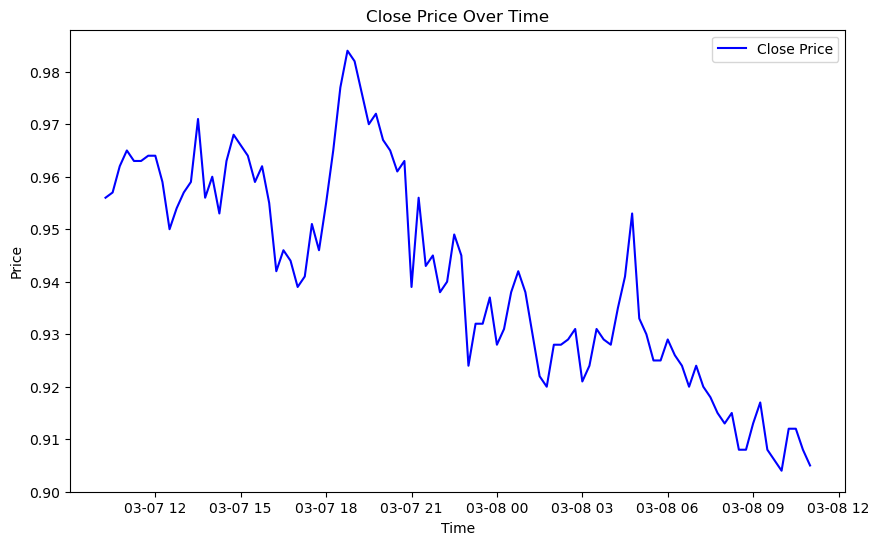

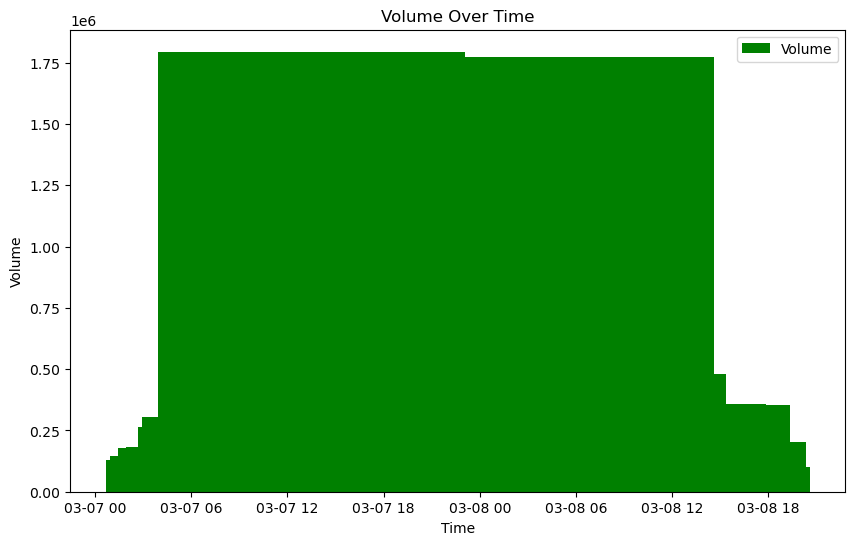

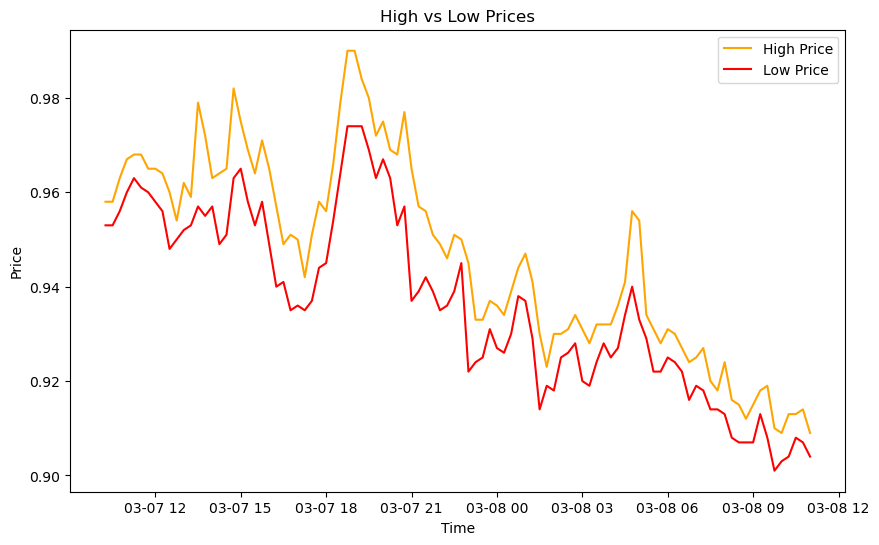

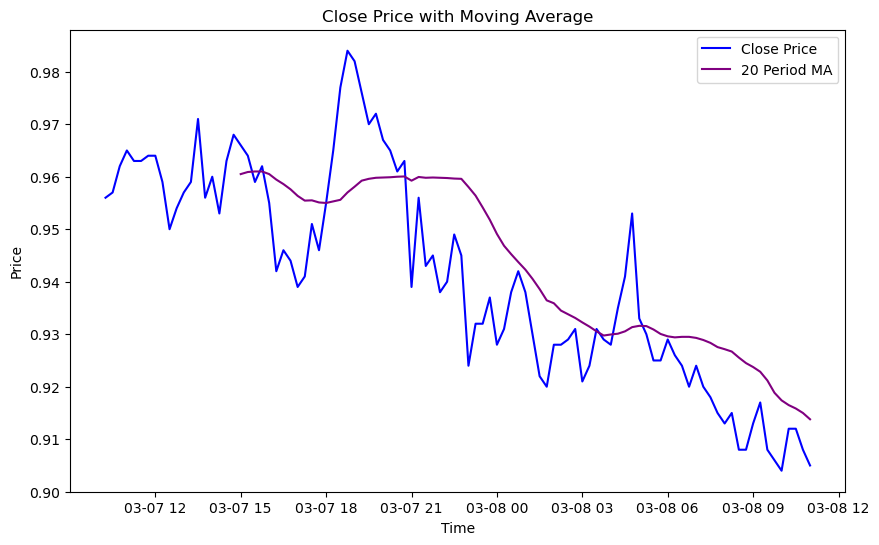

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 10:15:00  0.904  0.913  0.904  0.912  170419.1
96 2025-03-08 10:30:00  0.911  0.913  0.908  0.912  170311.9
97 2025-03-08 10:45:00  0.913  0.914  0.907  0.908  204352.0
98 2025-03-08 11:00:00  0.909  0.909  0.899  0.901  439323.9
99 2025-03-08 11:15:00  0.901  0.905  0.897  0.901  204591.9
Data saved to crypto_data.csv


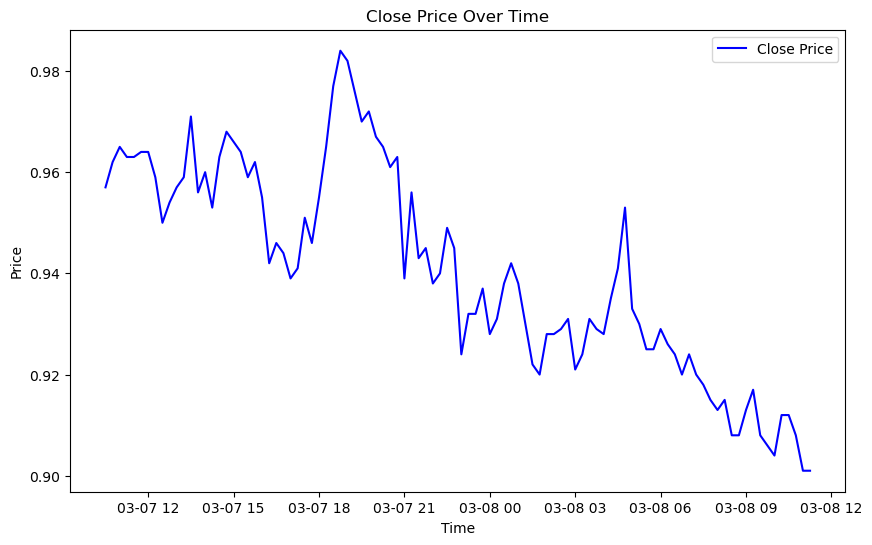

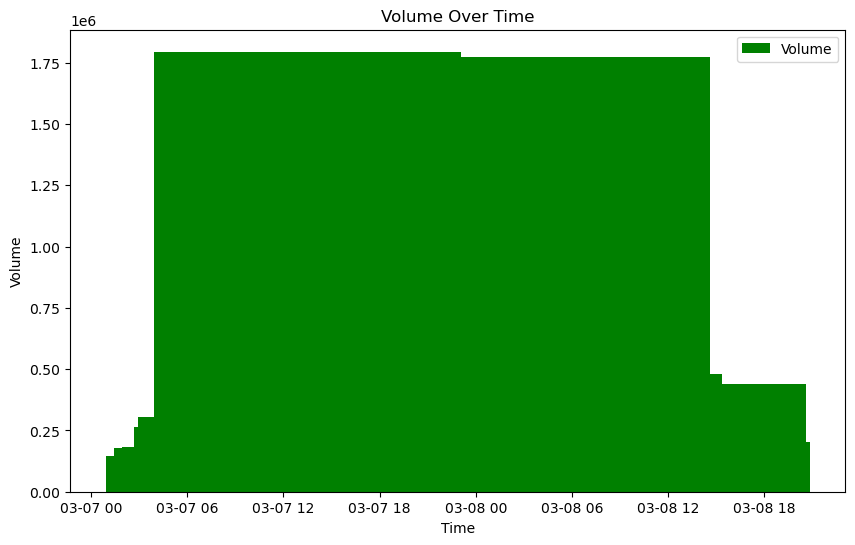

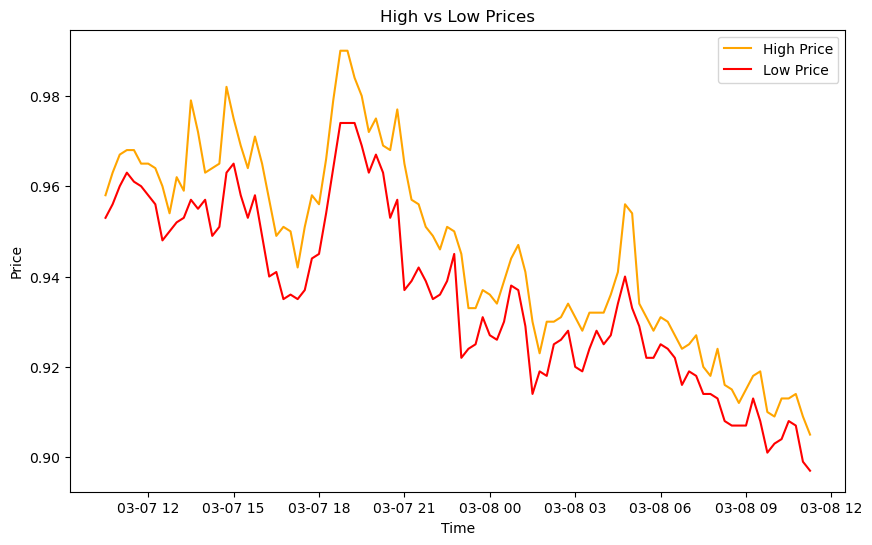

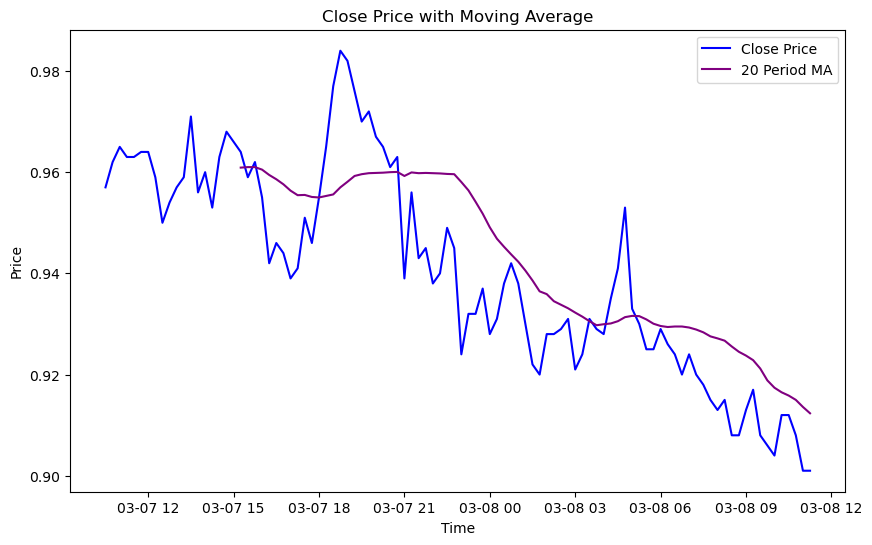

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 10:30:00  0.911  0.913  0.908  0.912  170311.9
96 2025-03-08 10:45:00  0.913  0.914  0.907  0.908  204352.0
97 2025-03-08 11:00:00  0.909  0.909  0.899  0.901  439323.9
98 2025-03-08 11:15:00  0.901  0.905  0.897  0.900  338472.6
99 2025-03-08 11:30:00  0.900  0.904  0.889  0.891  303489.6
Data saved to crypto_data.csv


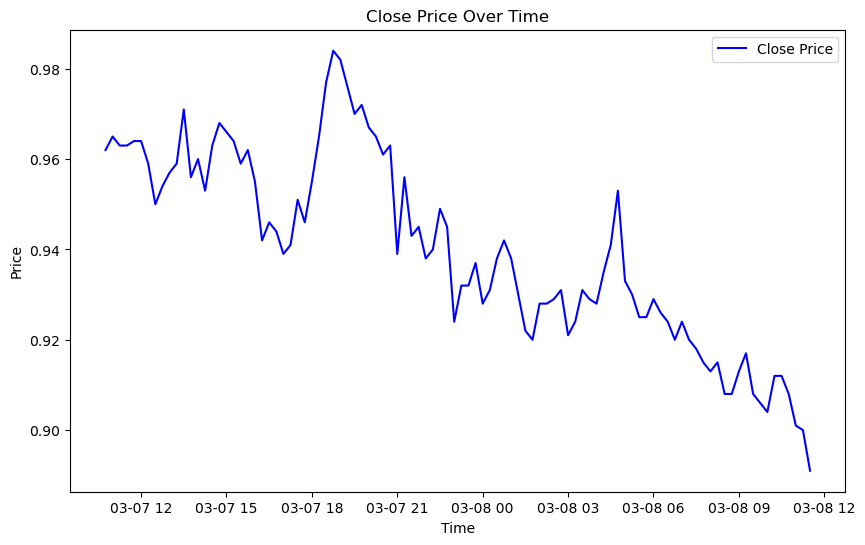

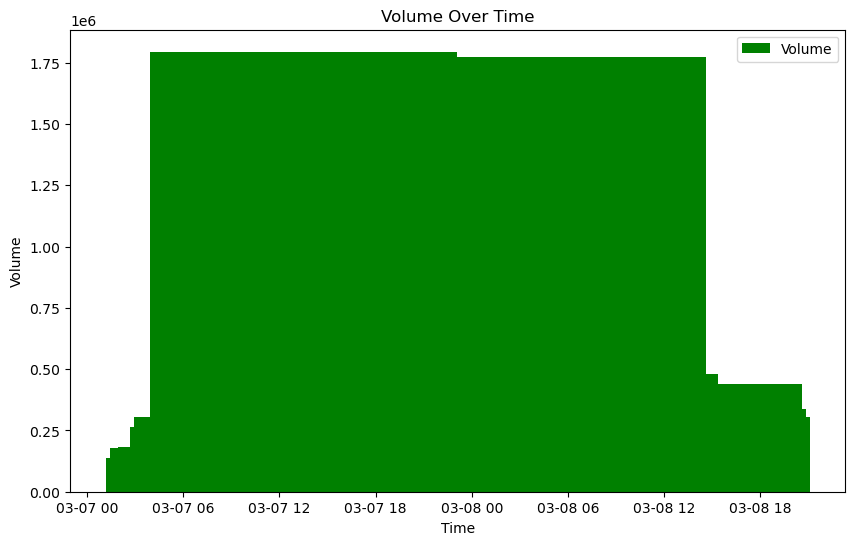

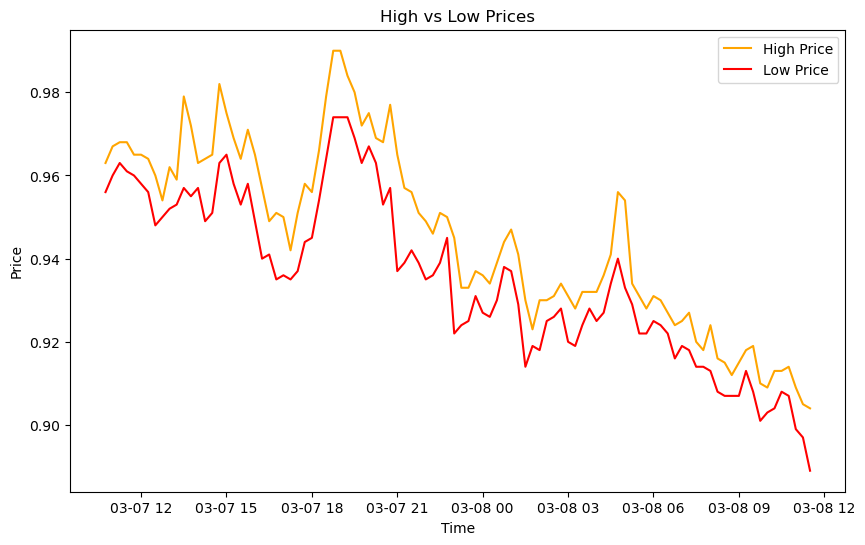

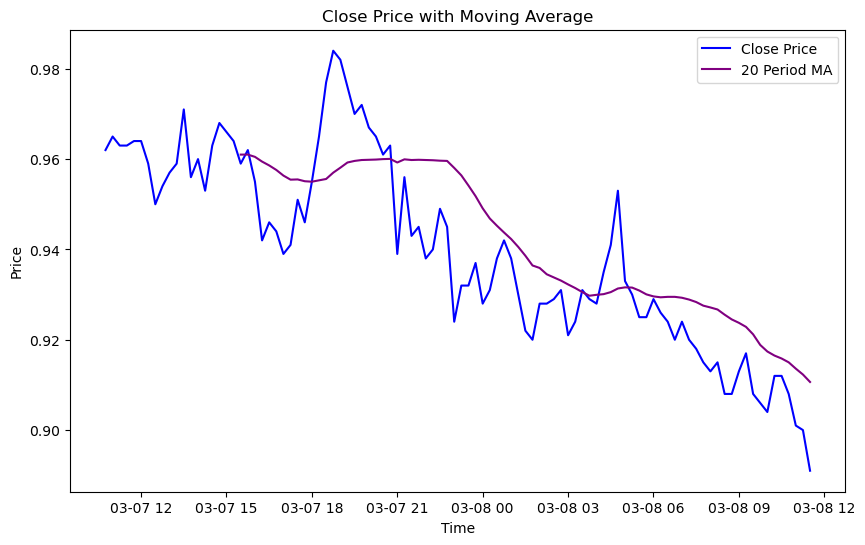

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 10:45:00  0.913  0.914  0.907  0.908  204352.0
96 2025-03-08 11:00:00  0.909  0.909  0.899  0.901  439323.9
97 2025-03-08 11:15:00  0.901  0.905  0.897  0.900  338472.6
98 2025-03-08 11:30:00  0.900  0.904  0.889  0.894  566105.2
99 2025-03-08 11:45:00  0.894  0.896  0.888  0.893  173235.4
Data saved to crypto_data.csv


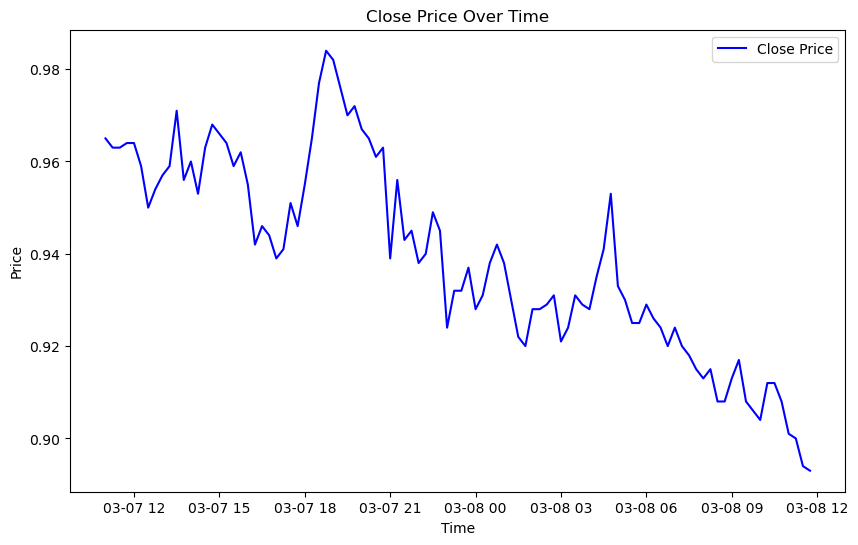

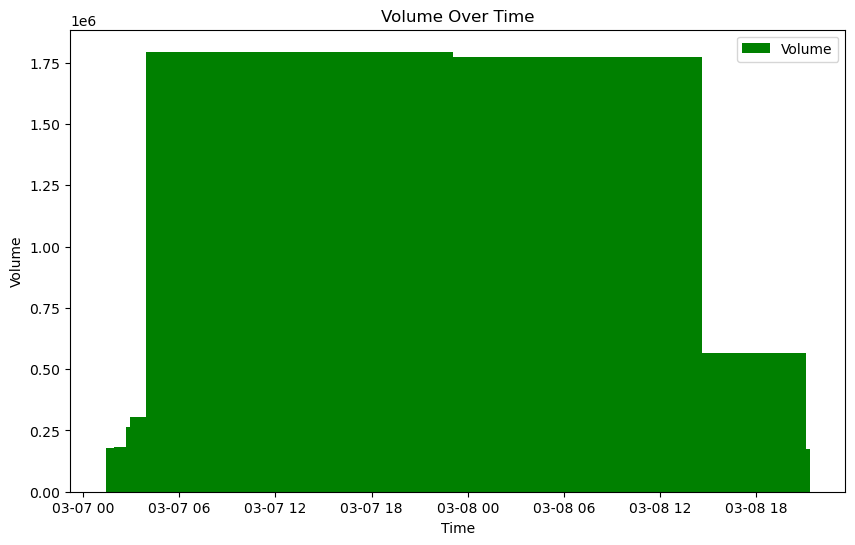

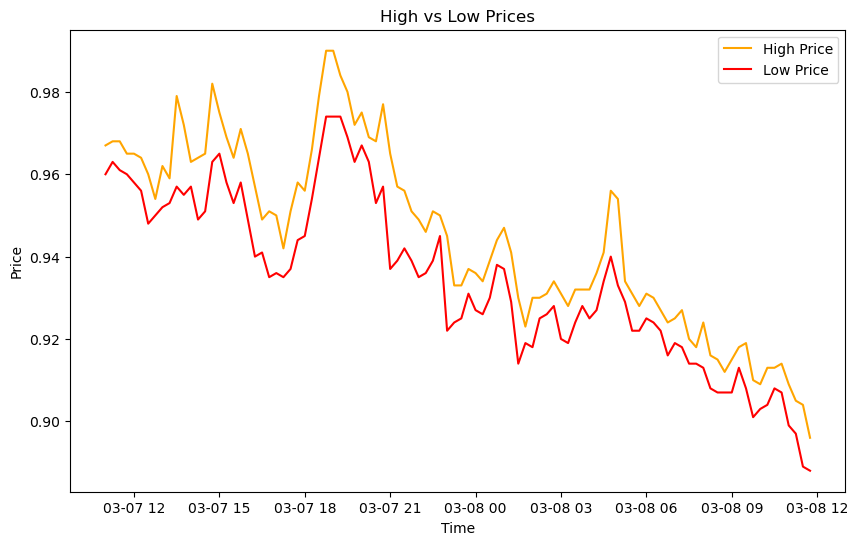

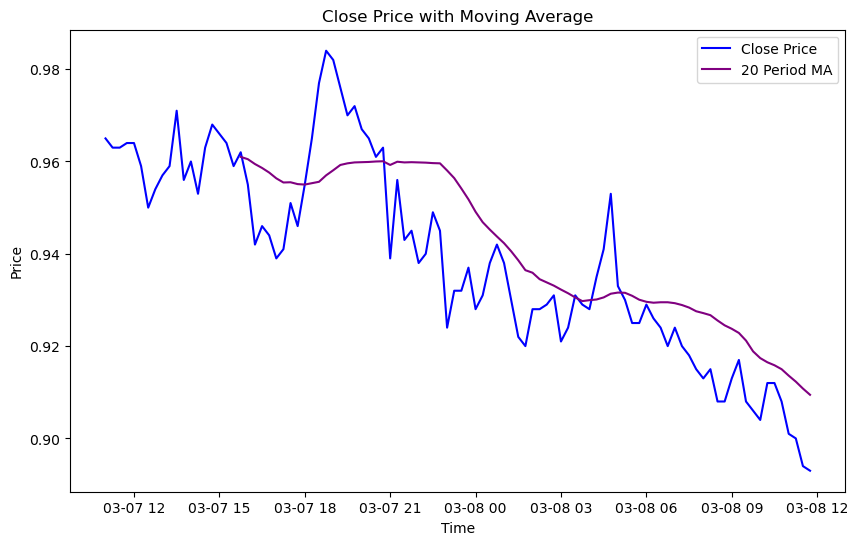

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 11:00:00  0.909  0.909  0.899  0.901  439323.9
96 2025-03-08 11:15:00  0.901  0.905  0.897  0.900  338472.6
97 2025-03-08 11:30:00  0.900  0.904  0.889  0.894  566105.2
98 2025-03-08 11:45:00  0.894  0.896  0.888  0.895  302528.6
99 2025-03-08 12:00:00  0.896  0.898  0.889  0.891  104392.9
Data saved to crypto_data.csv


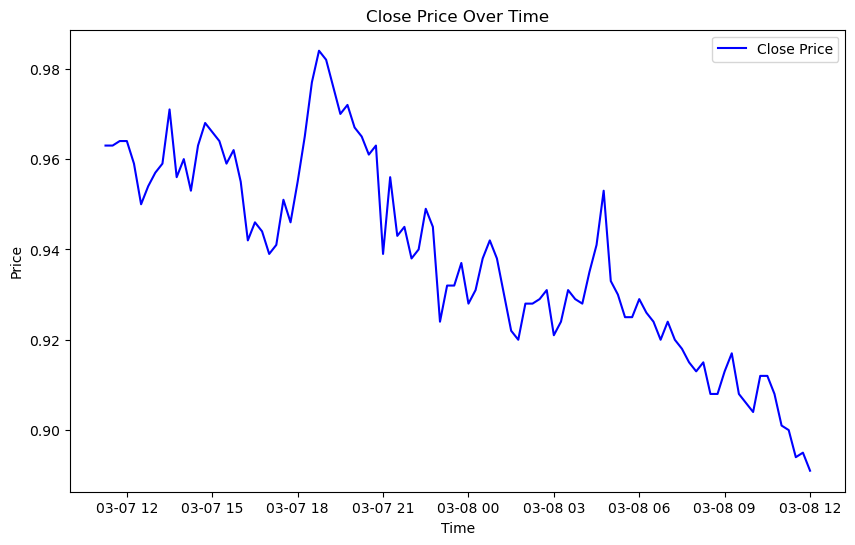

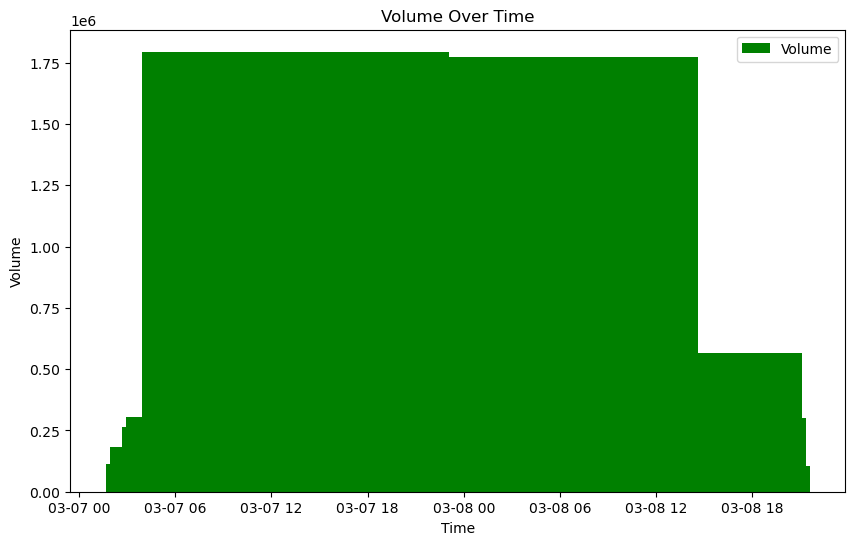

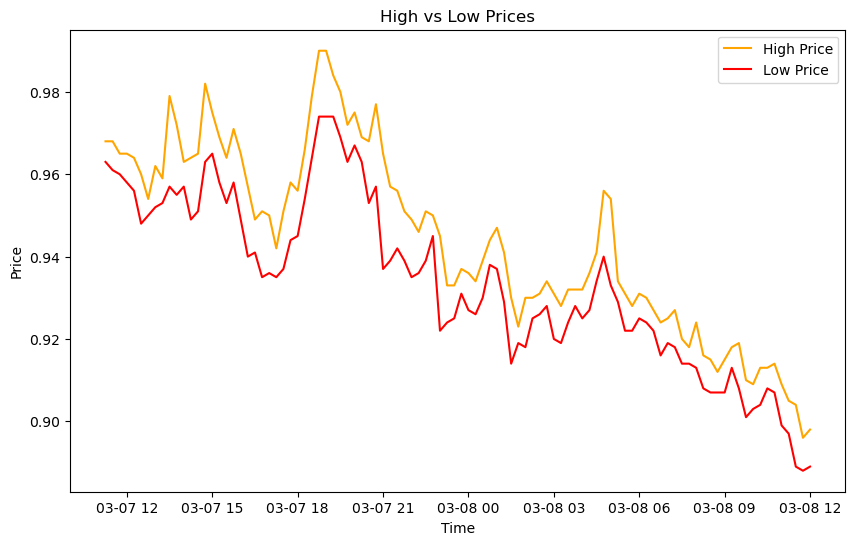

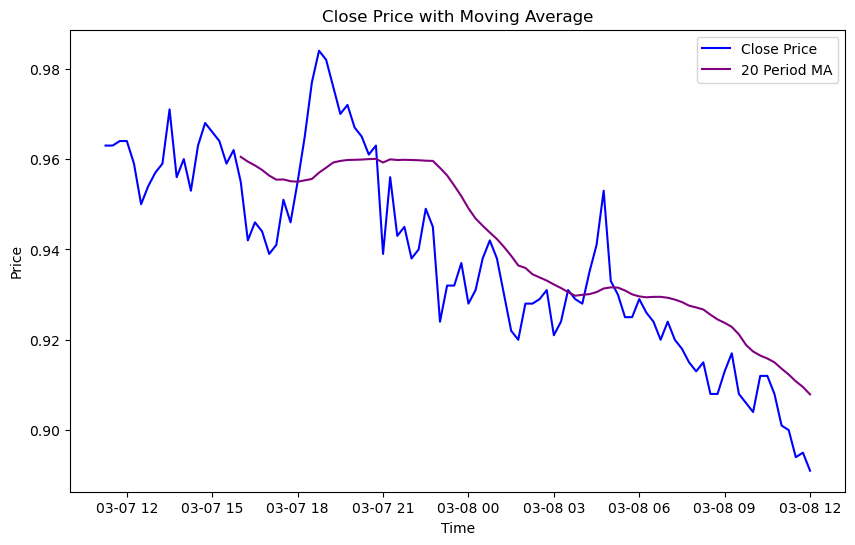

New data fetched:
             timestamp   open   high    low  close    volume
95 2025-03-08 11:15:00  0.901  0.905  0.897  0.900  338472.6
96 2025-03-08 11:30:00  0.900  0.904  0.889  0.894  566105.2
97 2025-03-08 11:45:00  0.894  0.896  0.888  0.895  302528.6
98 2025-03-08 12:00:00  0.896  0.898  0.886  0.894  269927.7
99 2025-03-08 12:15:00  0.893  0.902  0.891  0.900  183216.1
Data saved to crypto_data.csv
Dataset has reached 1000 rows. Stopping...


In [21]:
# Run the main function
if __name__ == "__main__":
    main()